In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1i-JbDm2nY15NnYl62GxlsBCoELp1HJZ3")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


#City vs Resort

In [ ]:
city = df.loc[df['hotel'] == "City Hotel"]
city.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,No Deposit,6.0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-03
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,1,Canceled,2015-07-01
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,No Deposit,9.0,NaN,0,Transient,68.0,0,1,Canceled,2015-04-30
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,2,Canceled,2015-06-23
40064,City Hotel,1,100,2015,July,27,2,0,2,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,1,Canceled,2015-04-02


In [ ]:
resort = df.loc[df['hotel'] == 'Resort Hotel']
resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
print(city.shape)
print(resort.shape)

(79330, 32)
(40060, 32)


**Important**: A bit imbalanced towards city hotels. Maybe we can conduct stratified or random sampling from city hotels to balance it out? Stratification would help if there are confounders in large sections of the data

**Collinearity analysis:** heatmap focusing on those >0.8 or <-0.8 
>larger than 0.8: not found in city heatmap; in resort heatmap "stay_in_weekend_nights" and "stay_in_week_nights" might be highly correlated.

><-0.8(dark ones): city heatmap: "arrival_date_year" and "arrival_date_week_number", "company" and "is_repeated_guest",; resort heatmap:"arrival_date_year" and "arrival_date_week_number","required_car_parking_spaces" and "is_cancelled"

<AxesSubplot:>

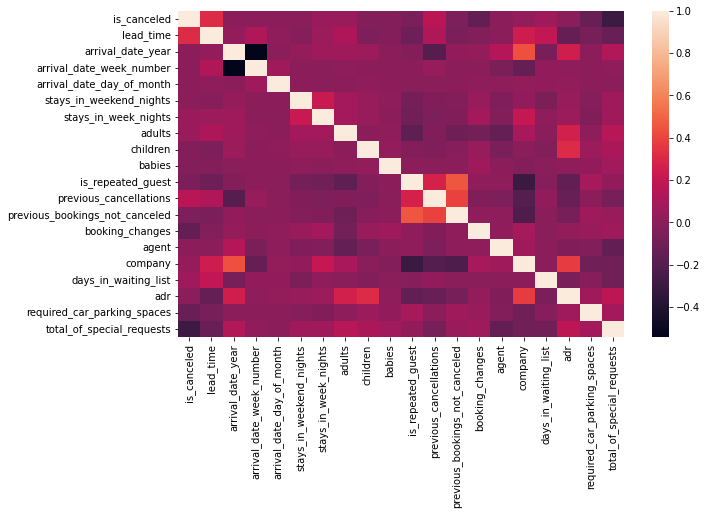

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(city.corr())

<AxesSubplot:>

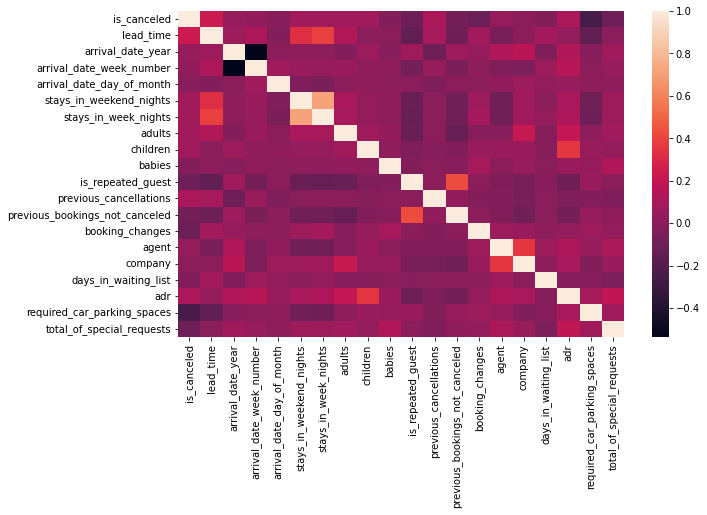

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(resort.corr())

**More info found**<br />
Largely the same correlation patterns betweem them, but some observations:
- Resorts have noticeably more correlation for 'is_repeated_guest' and 'previous_cancellations' than city. Leads me to think please like fulfilling their repeated stays in city hotels more than resorts.
- Stuff about 'company':
  - City hotels have more correlation between 'company' and 'arrival_date_year'.
  - Resorts have big correlation between 'company' and 'agent'.
  - These two observations lead me to think corporate bookings are handled differently between the two types.
- Weekdays and weekend durations have more correlation in resorts, making it seem that the durations are more evenly spread out for resorts.
- More correlation in resorts for 'stays_in_week_nights' and 'lead_time'

In [ ]:
# column length
len(city.columns)

32

In [ ]:
# Cause it was throwing some errors
city['country'] = city['country'].astype(str)
resort['country'] = resort['country'].astype(str)

<ipython-input-72-4d62ceb2ea3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city['country'] = city['country'].astype(str)
<ipython-input-72-4d62ceb2ea3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resort['country'] = resort['country'].astype(str)


<ipython-input-70-6016acb863b5>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,2, figsize=(20, 4))


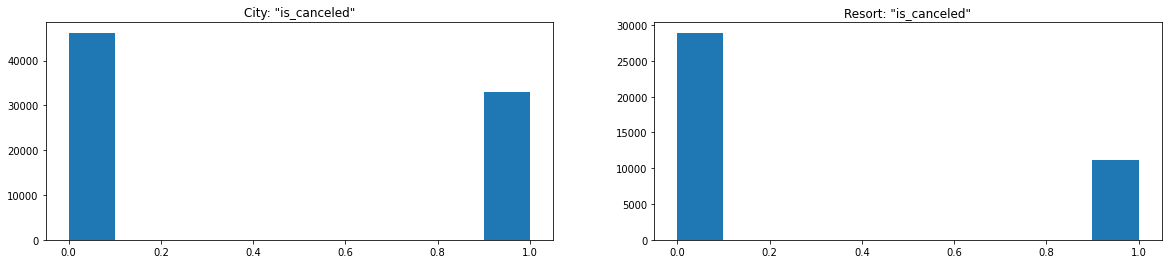

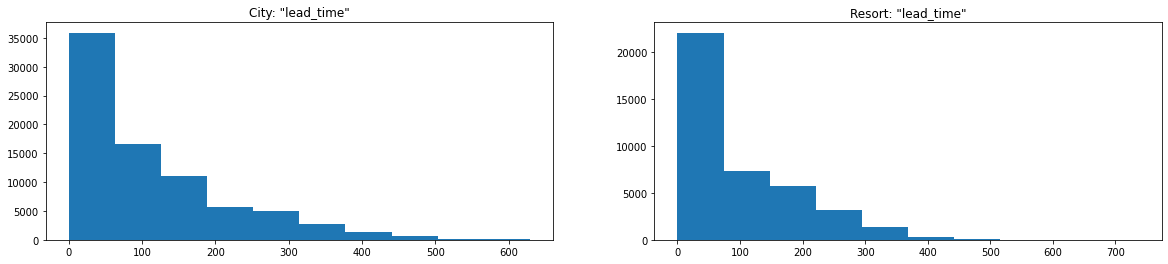

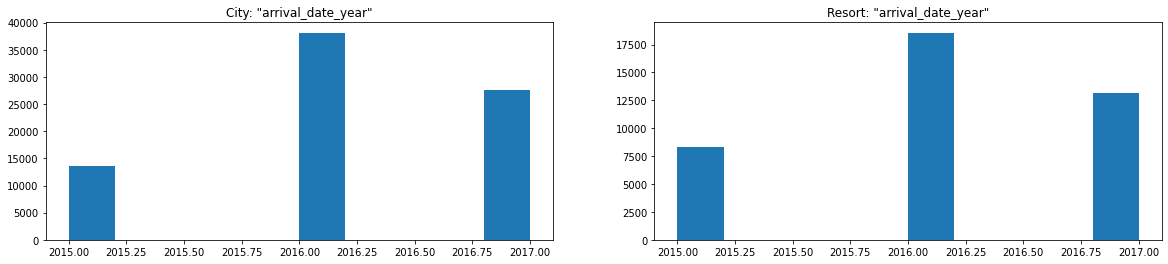

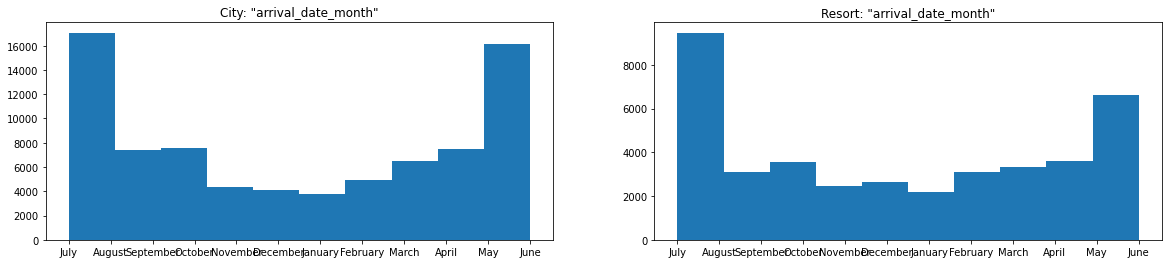

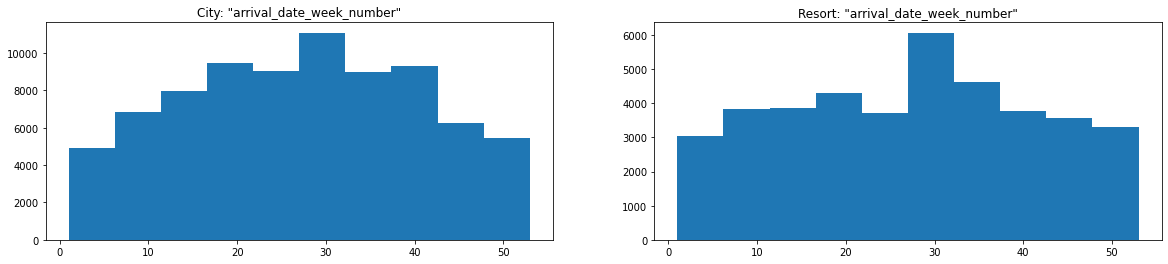

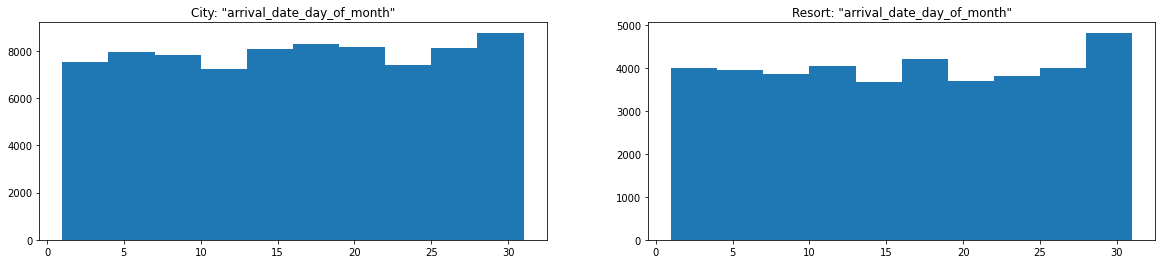

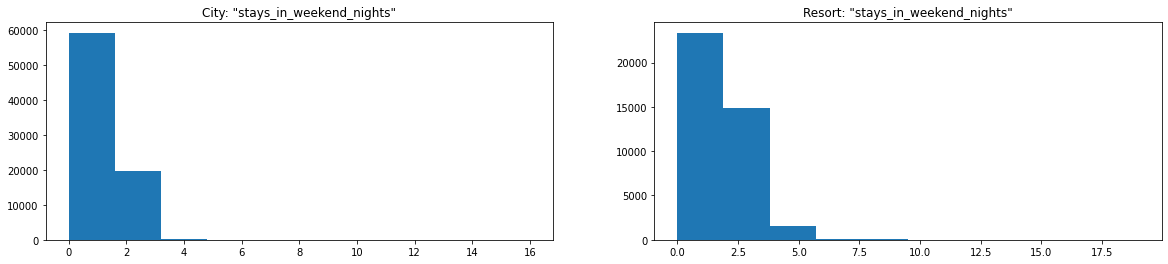

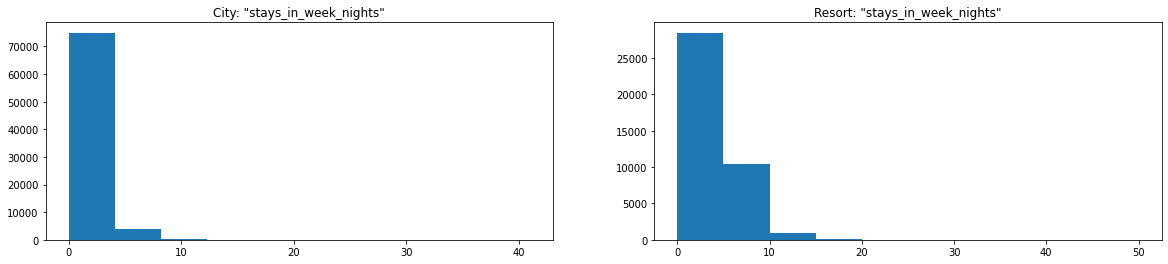

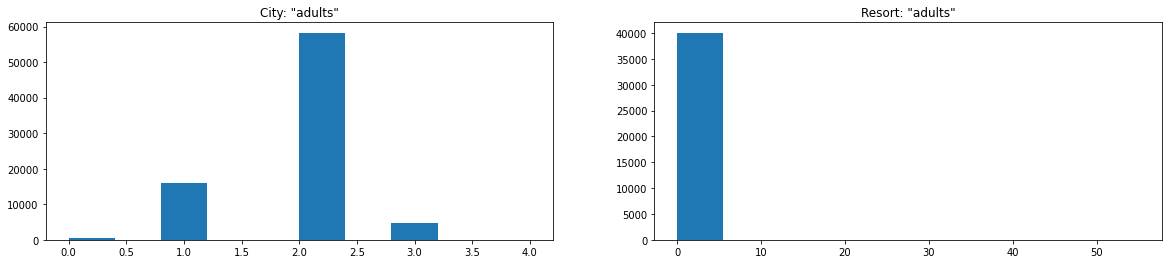

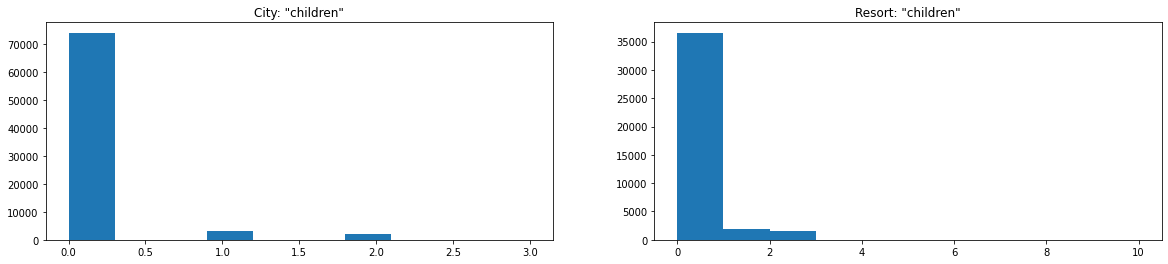

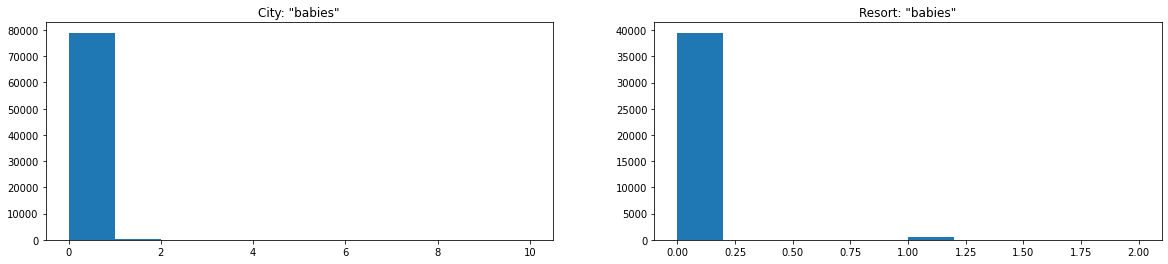

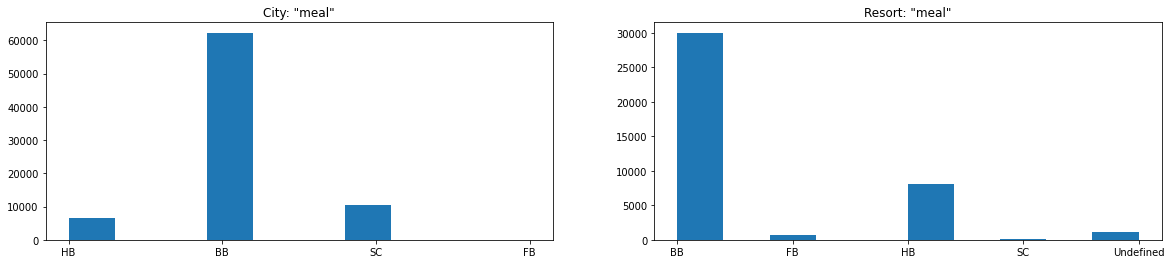

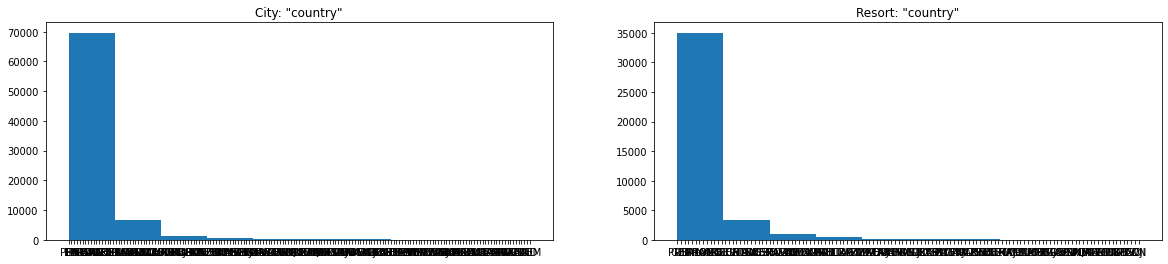

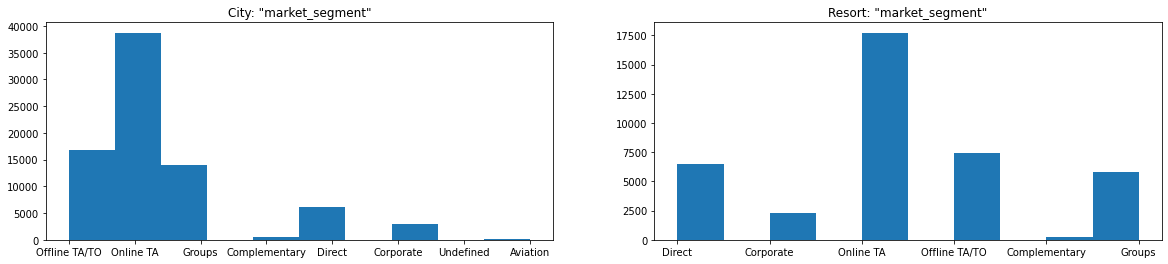

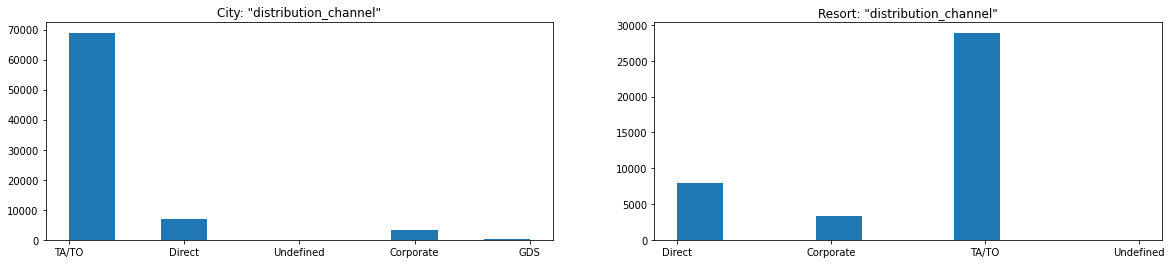

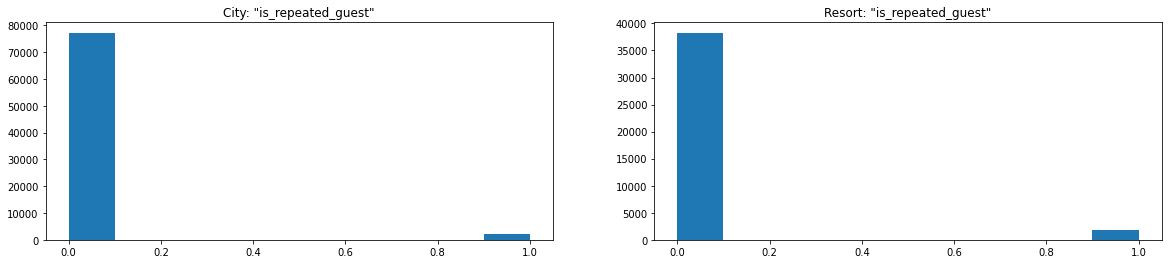

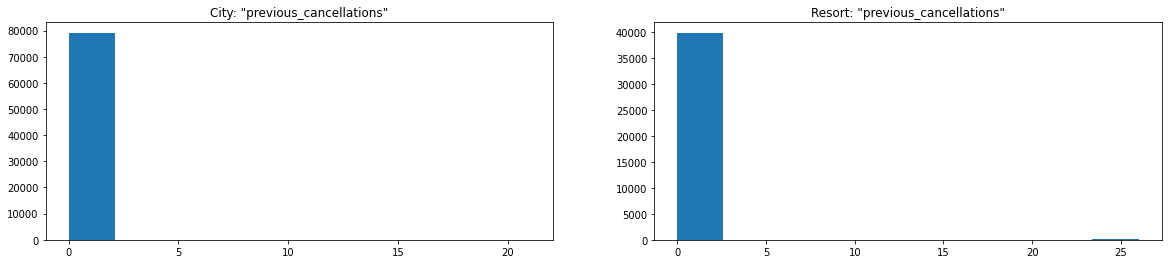

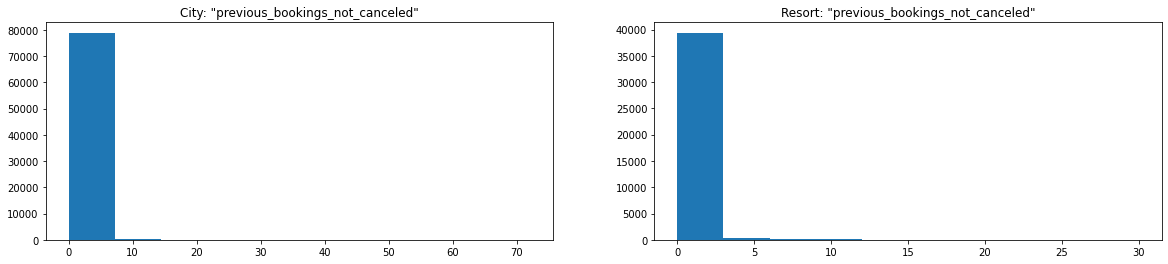

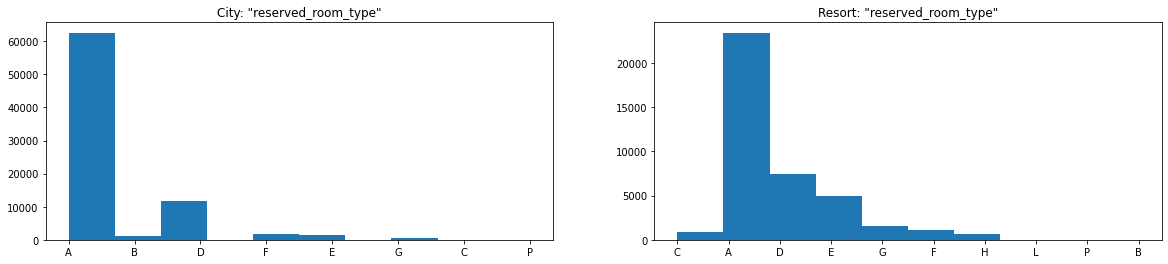

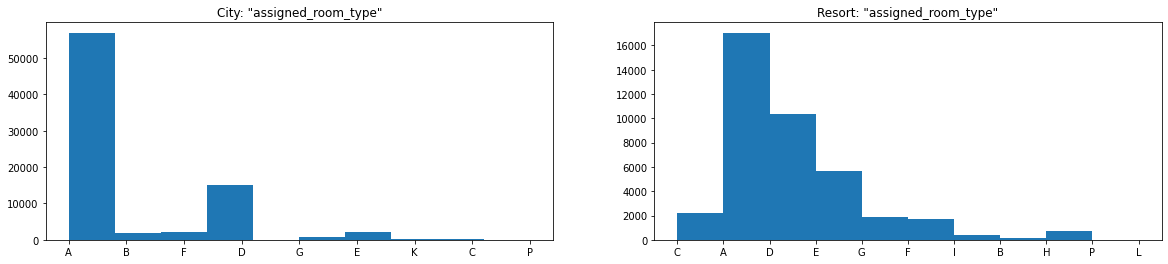

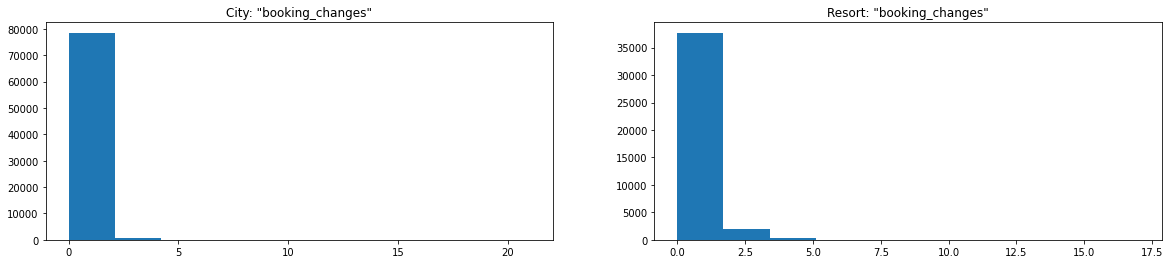

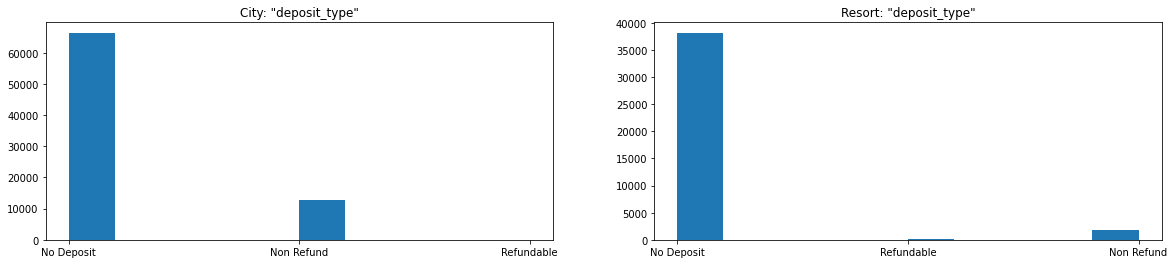

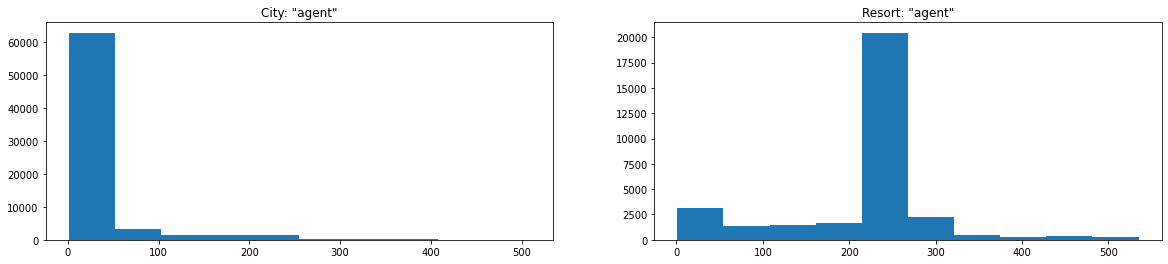

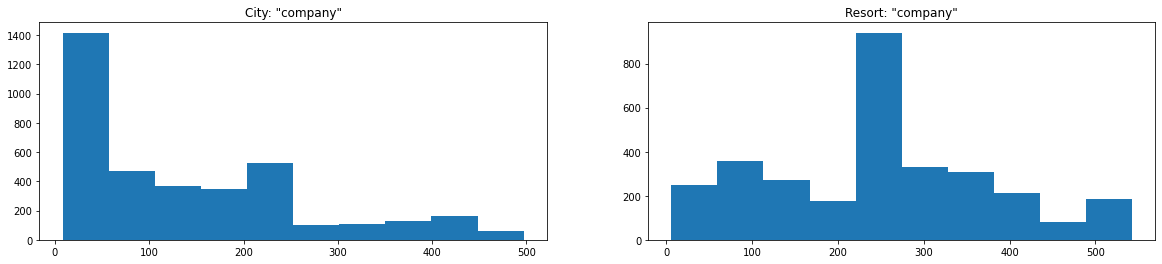

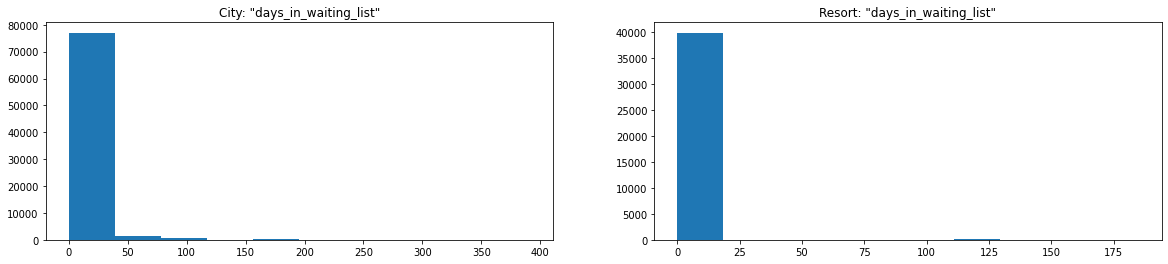

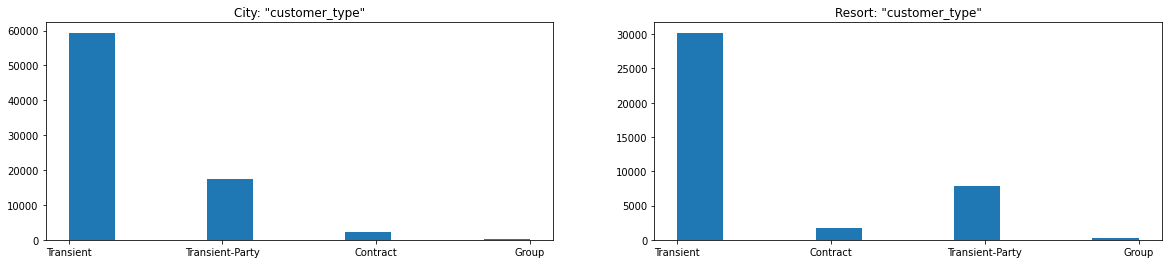

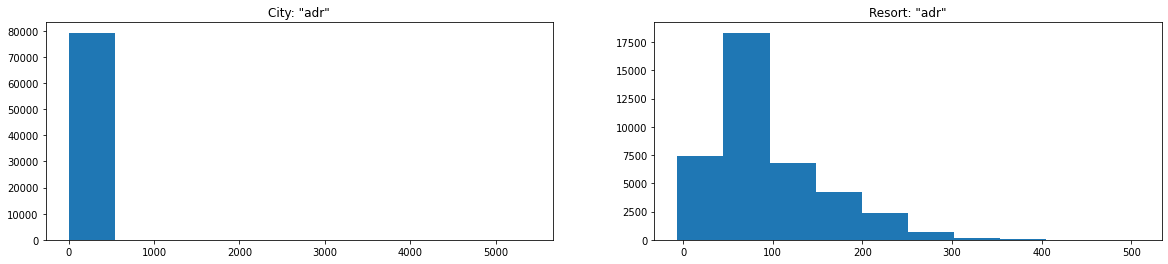

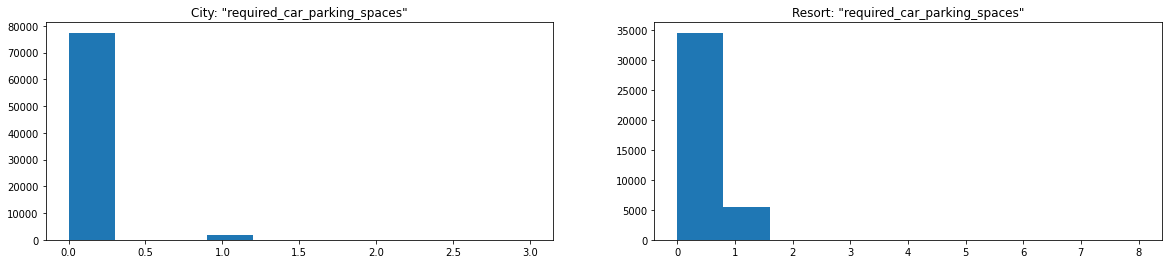

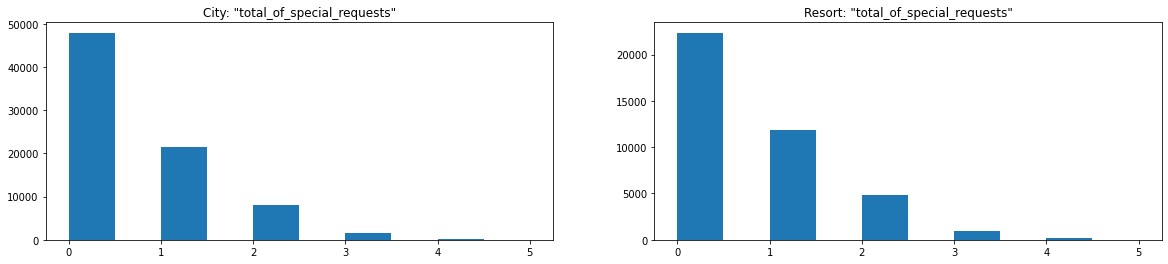

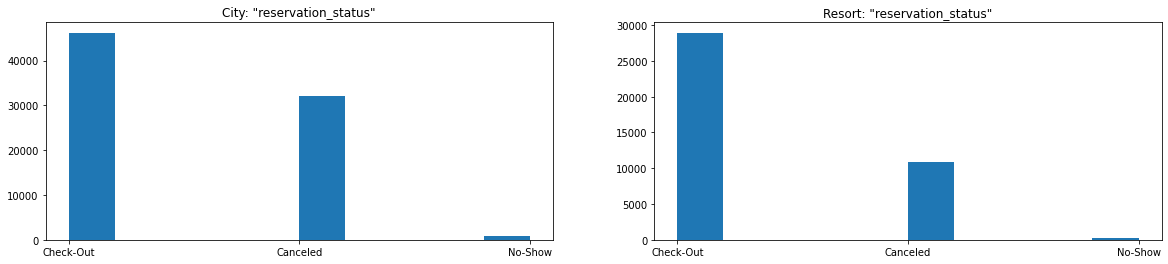

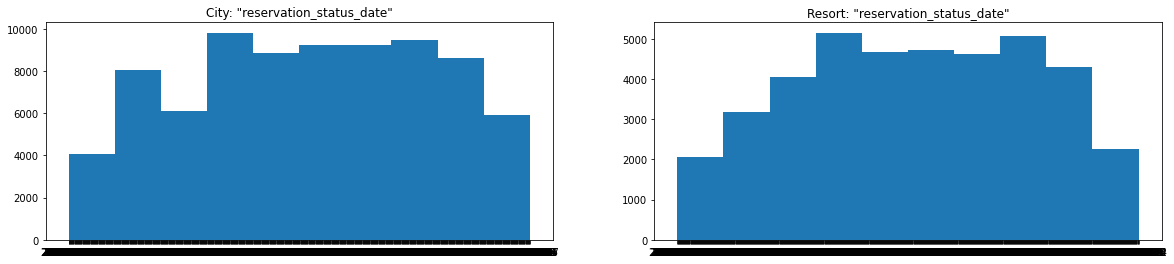

In [ ]:
# 2x total cols = 64 plots in 32 pairs

for r in range(32):
  col = city.columns[r]
  
  if (col == 'hotel'):
    continue

  fig, ax = plt.subplots(1,2, figsize=(20, 4))
  ax[0].set_title(f'City: "{col}"')
  ax[1].set_title(f'Resort: "{col}"')
  ax[0].hist(city[col])
  ax[1].hist(resort[col])

**Shit i found**<br />
(still in progress)
- Resort hotel car parking spaces is more
- Other that mostly the same distribution

Nuances
- Company and other data might not be numerical so the histplot is not a good way to see. (e.g. company number might be the identifier for one company)

In [ ]:
def show_cancelations_by_month(df):
    # print(df)
    is_canceled_by_month = df.groupby("arrival_date_month")["is_canceled"]
    total_bookings = is_canceled_by_month.count()
    total_cancelations = is_canceled_by_month.sum()
    rate_of_cancelations = total_cancelations/total_bookings * 100

    new_df =pd.DataFrame(pd.concat([total_bookings, total_cancelations, rate_of_cancelations], axis=1))
    new_df.columns = ["total_bookings", "total_cancelations", "rate_of_cancelations"]
    print(new_df)

    comparative = {}
    comparative["mean"] = rate_of_cancelations.mean()
    comparative["std"] = rate_of_cancelations.std()
    print("\nMean/Standard Deviation of rate of cancelations")
    print(pd.Series(comparative))

In [ ]:
show_cancelations_by_month(city)

                    total_bookings  total_cancelations  rate_of_cancelations
arrival_date_month                                                          
April                         7480                3465             46.323529
August                        8983                3602             40.097963
December                      4132                1740             42.110358
February                      4965                1901             38.288016
January                       3736                1482             39.668094
July                          8088                3306             40.875371
June                          7894                3528             44.692171
March                         6458                2386             36.946423
May                           8232                3653             44.375607
November                      4357                1661             38.122561
October                       7605                3268             42.971729

In [ ]:
show_cancelations_by_month(resort)

                    total_bookings  total_cancelations  rate_of_cancelations
arrival_date_month                                                          
April                         3609                1059             29.343308
August                        4894                1637             33.449121
December                      2648                 631             23.829305
February                      3103                 795             25.620367
January                       2193                 325             14.819881
July                          4573                1436             31.401706
June                          3045                1007             33.070608
March                         3336                 763             22.871703
May                           3559                1024             28.772127
November                      2437                 461             18.916701
October                       3555                 978             27.510549

In [ ]:
def show_cancelations_by_guest_type(df, guestType):
    # print(df)
    if guestType == "adults" :
      is_canceled_by_adults_count = df.groupby("adults")["is_canceled"]
      total_bookings = is_canceled_by_adults_count.count()
      total_cancelations = is_canceled_by_adults_count.sum()
      rate_of_cancelations = total_cancelations/total_bookings * 100
    elif guestType == "children" :
      is_canceled_by_children_count = df.groupby("children")["is_canceled"]
      total_bookings = is_canceled_by_children_count.count()
      total_cancelations = is_canceled_by_children_count.sum()
      rate_of_cancelations = total_cancelations/total_bookings * 100

    new_df =pd.DataFrame(pd.concat([total_bookings, total_cancelations, rate_of_cancelations], axis=1))
    new_df.columns = ["total_bookings", "total_cancelations", "rate_of_cancelations"]
    print(new_df)

    comparative = {}
    comparative["mean"] = rate_of_cancelations.mean()
    comparative["std"] = rate_of_cancelations.std()
    print("\nMean/Standard Deviation of rate of cancelations")
    print(pd.Series(comparative))

In [ ]:
show_cancelations_by_guest_type(city, "adults")

        total_bookings  total_cancelations  rate_of_cancelations
adults                                                          
0                  390                 107             27.435897
1                15879                5454             34.347251
2                58255               25756             44.212514
3                 4775                1778             37.235602
4                   31                   7             22.580645

Mean/Standard Deviation of rate of cancelations
mean    33.162382
std      8.438990
dtype: float64


In [ ]:
show_cancelations_by_guest_type(resort, "adults")

        total_bookings  total_cancelations  rate_of_cancelations
adults                                                          
0                   13                   2             15.384615
1                 7148                1220             17.067711
2                31425                9502             30.237072
3                 1427                 373             26.138753
4                   31                   9             29.032258
5                    2                   2            100.000000
6                    1                   1            100.000000
10                   1                   1            100.000000
20                   2                   2            100.000000
26                   5                   5            100.000000
27                   2                   2            100.000000
40                   1                   1            100.000000
50                   1                   1            100.000000
55                   1   

Isn't this one heavily influenced by outliers? Should we get rid of outliers?

[1.22235346e-02 2.36035922e-03 3.67453332e-03 8.06056094e-03
 4.06231417e-03 8.69941218e-04 3.30541331e-03 1.29779249e-03
 1.92460358e-03 4.08594860e-03 8.85395946e-03 1.78540839e-03
 9.47495631e-01]


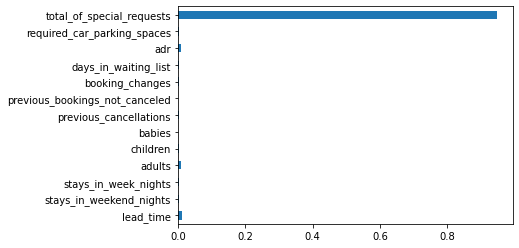

In [ ]:
numericals = ["lead_time", "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children", "babies", "previous_cancellations", "previous_bookings_not_canceled", "booking_changes", "days_in_waiting_list", "adr", "required_car_parking_spaces", "total_of_special_requests"]
city_copy = city.copy()
city_copy.dropna(subset=['children'], inplace=True)
city_copy['children'] = city_copy['children'].astype(int)
city_numericals = city_copy[numericals]
X = city_numericals.iloc[:,:]  #independent columns
y = city_numericals.iloc[:,-1]
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.show()